### Explanation of Bundle Data Structure

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# see https://numpy.org/doc/stable/reference/generated/numpy.savez.html for details on npz files
bundle = np.load("data/gourd/frame_bundle.npz", allow_pickle=True)

In [3]:
frame = 0 # change this from 0 - 119 to explore the contents of the bundle

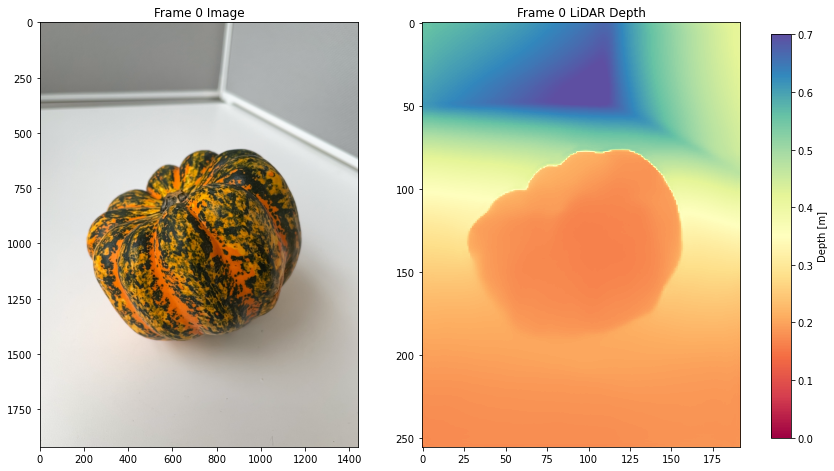


Camera Info at Frame 0: 

Timestamp: 0.0 

World to Camera Transform: 
 [[ 0.6707965   0.0803281   0.7372784  -0.6046981 ]
 [ 0.35995182  0.8339167  -0.4183512   0.21047588]
 [-0.64843404  0.5460132   0.53047407  0.40405482]
 [ 0.          0.          0.          0.99999976]] 

Camera Intrinsics: 
 [[1.5741235e+03 0.0000000e+00 9.6265619e+02]
 [0.0000000e+00 1.5741235e+03 7.2189966e+02]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00]]


In [4]:
img = bundle['img_{0}'.format(frame)] # camera image, numpy array
depth = bundle['depth_{0}'.format(frame)] # lidar depth in meters, numpy array
info = bundle['info_{0}'.format(frame)].item() # pose + camera information, dictionary

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
axes[0].imshow(img)
axes[0].set_title("Frame {0} Image".format(frame))
im = axes[1].imshow(depth, cmap='Spectral', vmin=0, vmax=0.7)
axes[1].set_title("Frame {0} LiDAR Depth".format(frame))

fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Depth [m]')
plt.show()

# info contains frame time-stamp as well as pose and intrinsic information.

print()
print("Camera Info at Frame {0}: \n".format(frame))
print("Timestamp:", info['timestamp'], "\n")
print("World to Camera Transform: \n", info['world_to_camera'], "\n")
print("Camera Intrinsics: \n", info['intrinsics'])